# Assignment 3 [CITS5508] Machine Learning
### Stefan Nio [23104714]
### 20% Weighting, Due Friday, 24th May 2024 (Extension Special Consideration u/ 31st May)


### Outline
You will explore the California Housing dataset using various techniques, including Principal Component Analysis (PCA), clustering, and supervised learning algorithms. The goal is to analyze and model housing prices in California based on different features.


### 1. Submission (Part II)
This .ipynb file is one (1) of two files to be submitted for Assignment 3. This file contains all the supporting code that generated all the plots, numbers, etc that is presented in Part I.

# 2. Dataset
We will use a modified version of the California housing dataset (housingCalifornia.csv), which contains data from
the 1990 California census and includes information about housing prices and various factors
affecting housing values across different districts in California. The dataset comprises features
such as median income, housing median age, etc., and the target variable is the median house
value for California districts. The dataset unit (that is, each row in the dataset) corresponds to a
district. A district represents the smallest geographical unit for which the U.S. Census Bureau
publishes sample data. Typically, a district contains a population ranging from 600 to 3,000
individuals.


### Dataset Variables

The variables of the dataset are:

- **longitude**: district group longitude.
- **latitude**: district group latitude.
- **housingMedianAge**: median house age in the district.
- **totalRooms**: the total number of rooms in the district.
- **totalBedrooms**: the total number of bedrooms in the district.
- **population**: district population.
- **households**: the total number of households in the district.
- **medianIncome**: median income in the district.
- **oceanProximity**: whether each district is near the ocean, near the Bay area, inland, or on an island (categorical).
- **medianHouseValue**: the median house value (target variable).


In all asked implementations, you should set random state=5508 when necessary for results reproducibility.

## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
housing_df = pd.read_csv("housingCalifornia.csv")
housing_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200


# D1

## (a)

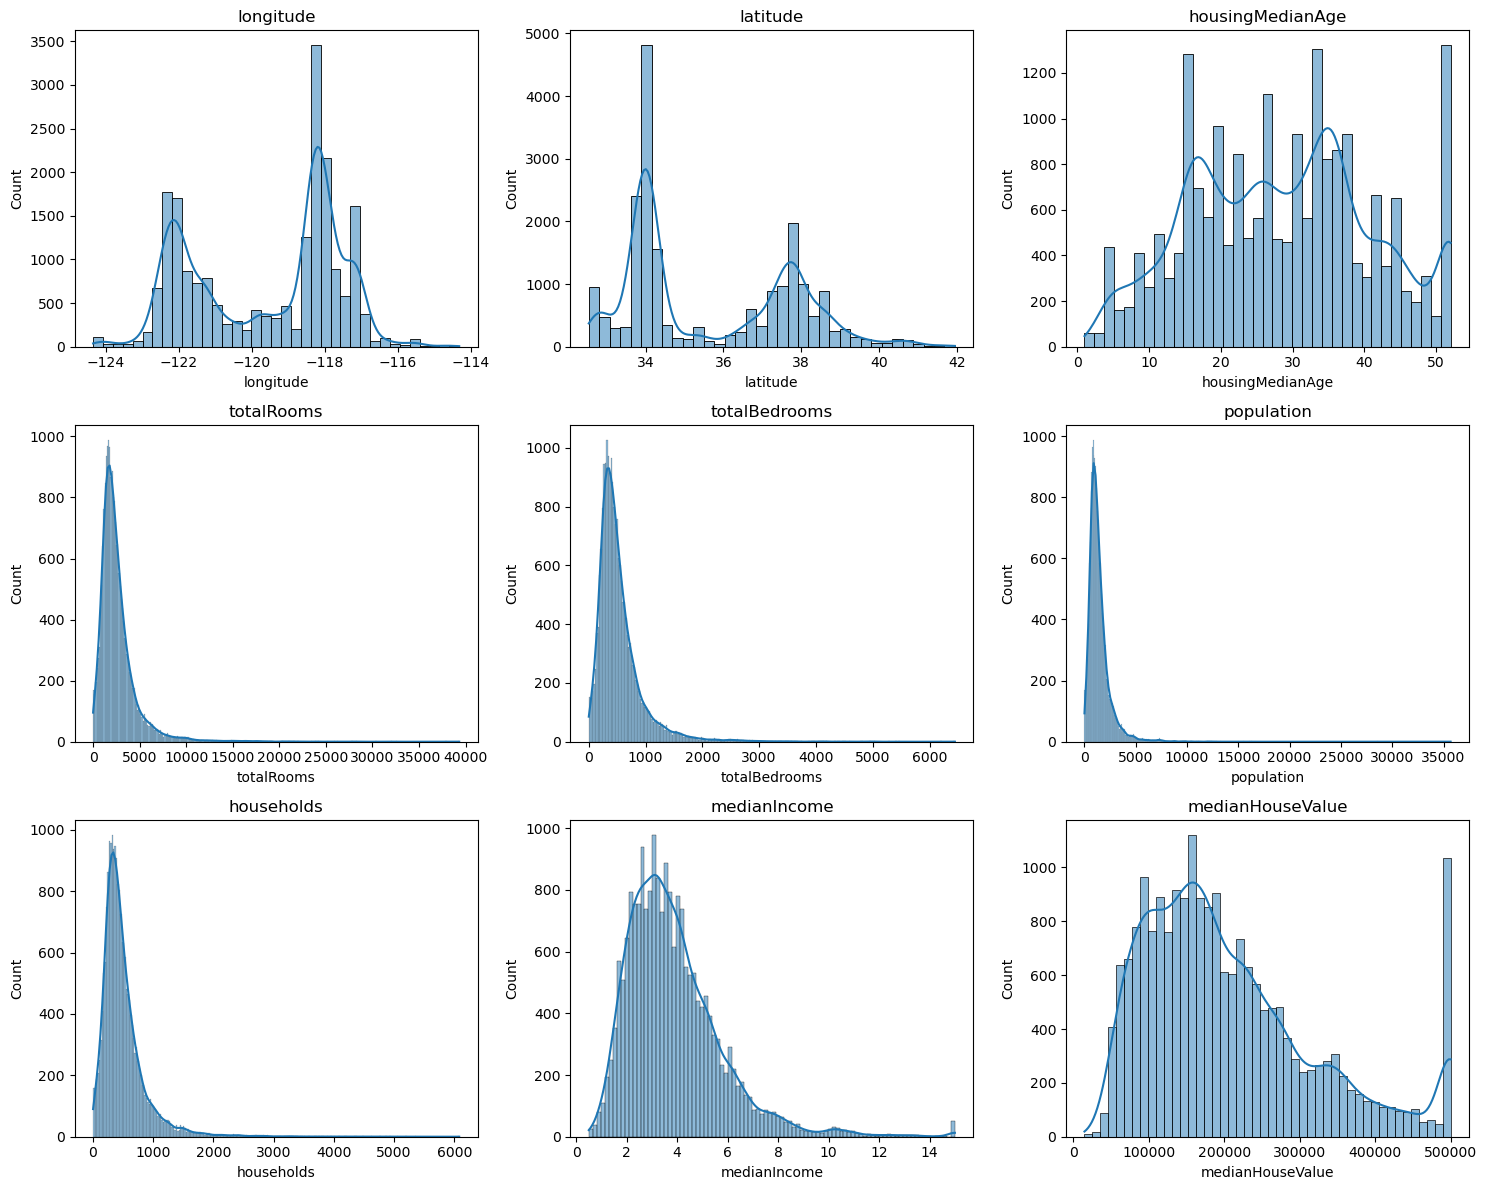

In [3]:
# List of non-categorical features and the target
features = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 
            'population', 'households', 'medianIncome', 'medianHouseValue']

# Plot the figure
plt.figure(figsize=(15, 12))

# Plot histograms
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(housing_df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

## (b)

In [4]:
# Drop the categorical variable
corr_matrix = housing_df.drop(columns=['oceanProximity']).corr()
corr_matrix

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


In [5]:
# Find highly correlated features
high_corr_features = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)].stack().reset_index()
high_corr_features = high_corr_features[high_corr_features['level_0'] != high_corr_features['level_1']]
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

high_corr_features

,Feature 1,Feature 2,Correlation
1,longitude,latitude,-0.924664
2,latitude,longitude,-0.924664
6,totalRooms,totalBedrooms,0.929893
7,totalRooms,population,0.857126
8,totalRooms,households,0.918484
9,totalBedrooms,totalRooms,0.929893
11,totalBedrooms,population,0.878026
12,totalBedrooms,households,0.979829
13,population,totalRooms,0.857126
14,population,totalBedrooms,0.878026


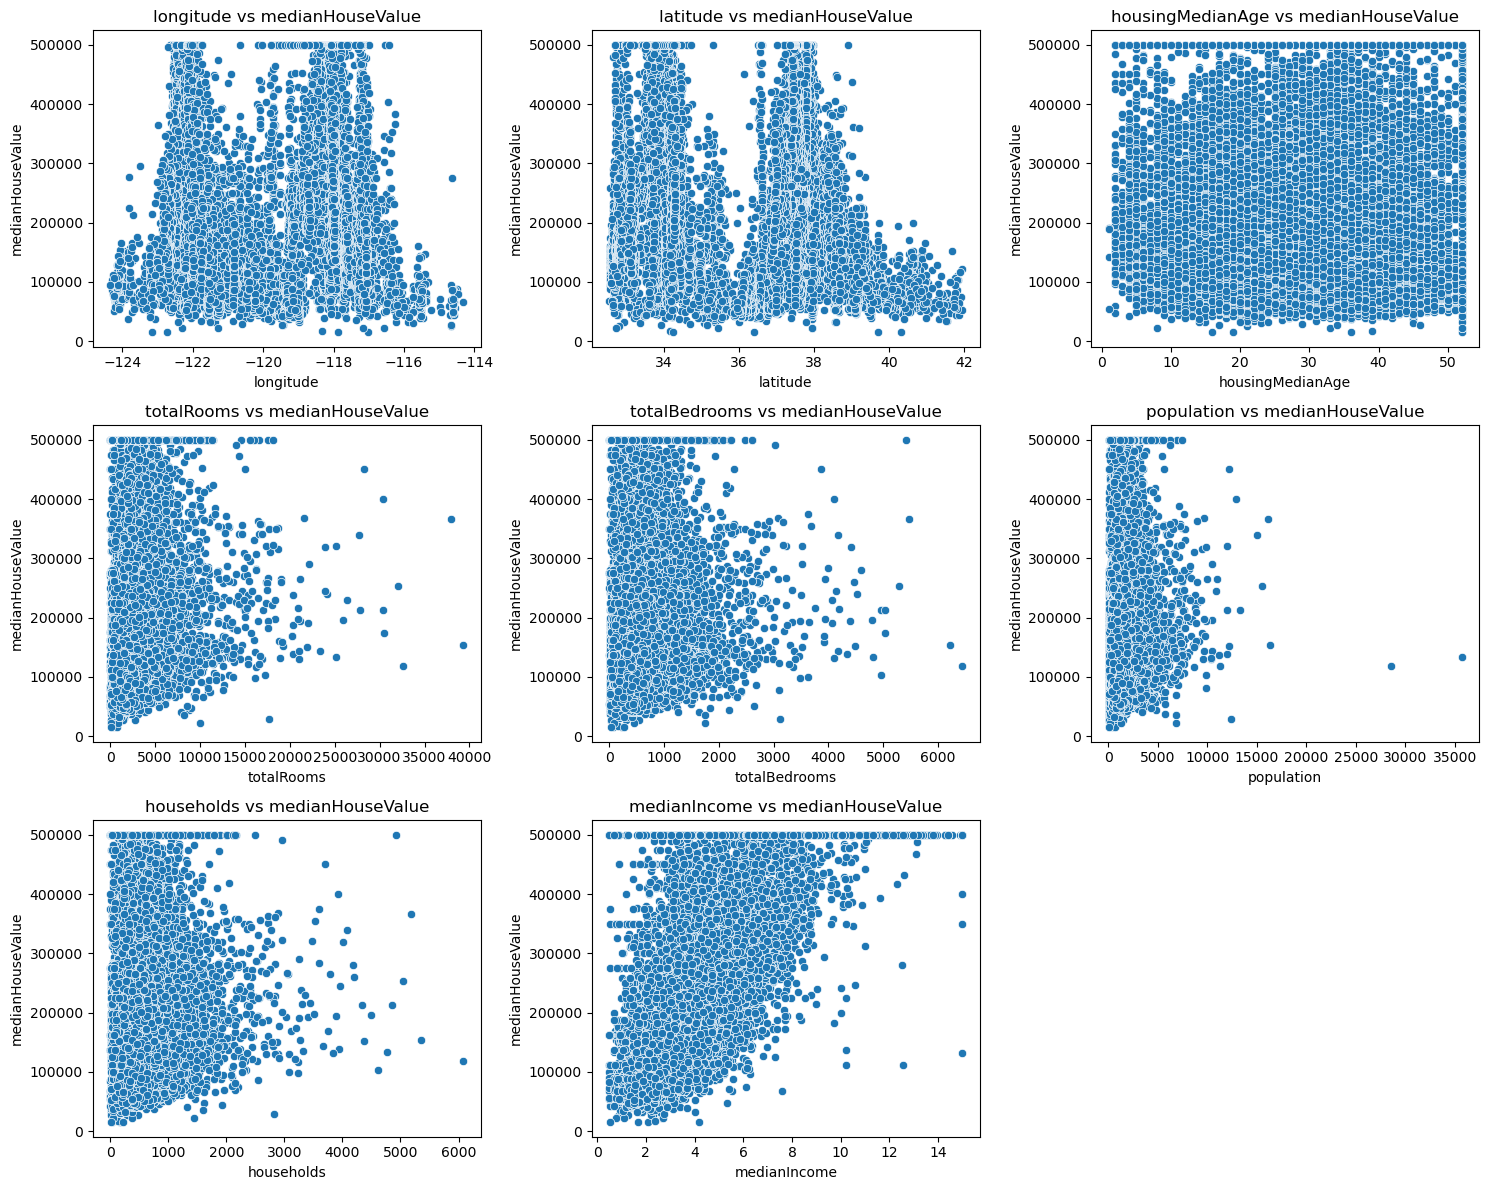

In [6]:
# Plot figure
plt.figure(figsize=(15, 12))

# Plot scatter plots
for i, feature in enumerate(features[:-1]):  # Exclude the target variable from the x-axis features
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=housing_df[feature], y=housing_df['medianHouseValue'])
    plt.title(f'{feature} vs medianHouseValue')

plt.tight_layout()
plt.show()


# Analysing the impact of different data transformations. 

Create two versions of the dataset
as described below. Remember to properly encode the categorical variable by creating l−1 new
binary/dummy variables, where l is the number of categories of the variable. Use “<1H OCEAN”
as a reference (you should not add a dummy variable for this category).


• The original dataset (that is, with the new dummy variables, removing the categorical
variable, and without any other changing the features). We will refer to this version as
data1.


• The dataset with the transformation in the target variable: change the unit of the target
variable to hundreds of thousands of dollars. For example, if the median house value of a
district was 452600.0 before, in this dataset, it will be 4.526. Thus, you will keep all the
original predictor variables (same features as data1) and update the target variable. This
version will be referred to as data2.

In [7]:
housing_df = pd.read_csv("housingCalifornia.csv")

# Encode the categorical variable, using "<1H OCEAN" as the reference category
data1 = pd.get_dummies(housing_df, columns=['oceanProximity'], drop_first=True)

# Data2 by transforming the target variable to hundreds of thousands of dollars
data2 = data1.copy()
data2['medianHouseValue'] = data2['medianHouseValue'] / 100000.0

data1.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,False,False,True,False


In [8]:
data2.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,4.526,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,3.585,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,3.521,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,3.413,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,3.422,False,False,True,False


# D2

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to split the data, fit models, and compute RMSE
def process_data(data, standardize=False, alpha=100):

    X = data.drop('medianHouseValue', axis=1)
    y = data['medianHouseValue']
    
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)
    
    # Standardize the data if required
    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Fit Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_train_pred_lr = lr_model.predict(X_train)
    y_test_pred_lr = lr_model.predict(X_test)
    rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
    rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
    
    # Fit Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
    rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

    print(f"Results for {'standardized' if standardize else 'original'} version of the data:")
    print(f"Linear Regression - RMSE Training: {rmse_train_lr}, RMSE Test: {rmse_test_lr}")
    print(f"Lasso Regression - RMSE Training: {rmse_train_lasso}, RMSE Test: {rmse_test_lasso}")
    print()

    # Return models along with RMSEs
    return lr_model, lasso_model, (rmse_train_lr, rmse_test_lr, rmse_train_lasso, rmse_test_lasso)


In [10]:
# Process data1 (original and standardized, linear and lasso regression)
print("Data1:")
lr_model_data1_original, lasso_model_data1_original, _ = process_data(data1, standardize=False)
lr_model_data1_standardized, lasso_model_data1_standardized, _ = process_data(data1, standardize=True)

# Process data2 (original and standardized, linear and lasso regression)
print("Data2:")
lr_model_data2_original, lasso_model_data2_original, _ = process_data(data2, standardize=False)
lr_model_data2_standardized, lasso_model_data2_standardized, _ = process_data(data2, standardize=True)


Data1:
Results for original version of the data:
Linear Regression - RMSE Training: 68607.3141310988, RMSE Test: 68589.31234032183
Lasso Regression - RMSE Training: 68660.50464281291, RMSE Test: 68601.80949979821

Results for standardized version of the data:
Linear Regression - RMSE Training: 68607.3141310988, RMSE Test: 68589.31234032218
Lasso Regression - RMSE Training: 68615.44109481508, RMSE Test: 68623.38356318384

Data2:
Results for original version of the data:
Linear Regression - RMSE Training: 0.686073141310988, RMSE Test: 0.6858931234032175
Lasso Regression - RMSE Training: 1.1293961641291712, RMSE Test: 1.1197610600292784

Results for standardized version of the data:
Linear Regression - RMSE Training: 0.686073141310988, RMSE Test: 0.6858931234032218
Lasso Regression - RMSE Training: 1.156302732313301, RMSE Test: 1.1443821141210113



# D3

In [11]:
data3 = data1.copy()

data3['meanRooms'] = data3['totalRooms'] / data3['households']
data3['meanBedrooms'] = data3['totalBedrooms'] / data3['households']
data3['meanOccupation'] = data3['population'] / data3['households']

data3.head()


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN,meanRooms,meanBedrooms,meanOccupation
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,False,False,True,False,6.984127,1.023810,2.555556
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,False,False,True,False,6.238137,0.971880,2.109842
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,False,False,True,False,8.288136,1.073446,2.802260
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,False,False,True,False,5.817352,1.073059,2.547945
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,False,False,True,False,6.281853,1.081081,2.181467


In [12]:
# Create data3 by dropping the specified original features and keeping the new features

data3 = data3.drop(['totalRooms', 'totalBedrooms', 'households', 'population'], axis=1)
data3['medianHouseValue'] = data3['medianHouseValue'] / 100000.0
data3.head()

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN,meanRooms,meanBedrooms,meanOccupation
0,-122.23,37.88,41,8.3252,4.526,False,False,True,False,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,3.585,False,False,True,False,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,3.521,False,False,True,False,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,3.413,False,False,True,False,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,3.422,False,False,True,False,6.281853,1.081081,2.181467


In [13]:
# Process data3 (original and standardized)
print("Data3:")
lr_model_data3_original, lasso_model_data3_original, _ = process_data(data3, standardize=False)
lr_model_data3_standardized, lasso_model_data3_standardized, _ = process_data(data3, standardize=True)

Data3:
Results for original version of the data:
Linear Regression - RMSE Training: 0.7094901591048488, RMSE Test: 1.1360103992432056
Lasso Regression - RMSE Training: 1.156302732313301, RMSE Test: 1.1443821141210113

Results for standardized version of the data:
Linear Regression - RMSE Training: 0.7094901591048489, RMSE Test: 1.136010399243209
Lasso Regression - RMSE Training: 1.156302732313301, RMSE Test: 1.1443821141210113



## (c)

In [14]:
# Function to print model coefficients
def print_model_coefficients(model, feature_names, model_name):
    print(f"Coefficients for {model_name}:")
    if hasattr(model, 'coef_'):
        for feature, coef in zip(feature_names, model.coef_):
            print(f"{feature}: {coef:.4f}")
    else:
        print("Model has no coefficients.")
    print()

# Define the features for data1, data2, and data3
features_data1 = data1.drop('medianHouseValue', axis=1).columns
features_data2 = data2.drop('medianHouseValue', axis=1).columns
features_data3 = data3.drop('medianHouseValue', axis=1).columns

# Print coefficients for all models
print_model_coefficients(lr_model_data1_original, features_data1, "Linear Regression Data1 (Original)")
print_model_coefficients(lr_model_data1_standardized, features_data1, "Linear Regression Data1 (Standardized)")
print_model_coefficients(lasso_model_data1_original, features_data1, "Lasso Regression Data1 (Original)")
print_model_coefficients(lasso_model_data1_standardized, features_data1, "Lasso Regression Data1 (Standardized)")

print_model_coefficients(lr_model_data2_original, features_data2, "Linear Regression Data2 (Original)")
print_model_coefficients(lr_model_data2_standardized, features_data2, "Linear Regression Data2 (Standardized)")
print_model_coefficients(lasso_model_data2_original, features_data2, "Lasso Regression Data2 (Original)")
print_model_coefficients(lasso_model_data2_standardized, features_data2, "Lasso Regression Data2 (Standardized)")

print_model_coefficients(lr_model_data3_original, features_data3, "Linear Regression Data3 (Original)")
print_model_coefficients(lr_model_data3_standardized, features_data3, "Linear Regression Data3 (Standardized)")
print_model_coefficients(lasso_model_data3_original, features_data3, "Lasso Regression Data3 (Original)")
print_model_coefficients(lasso_model_data3_standardized, features_data3, "Lasso Regression Data3 (Standardized)")

Coefficients for Linear Regression Data1 (Original):
longitude: -26533.2379
latitude: -25444.9108
housingMedianAge: 1055.9001
totalRooms: -6.4290
totalBedrooms: 102.9358
population: -36.3516
households: 45.1305
medianIncome: 39305.2068
oceanProximity_INLAND: -39134.8447
oceanProximity_ISLAND: 153585.7019
oceanProximity_NEAR BAY: -791.4702
oceanProximity_NEAR OCEAN: 4935.3229

Coefficients for Linear Regression Data1 (Standardized):
longitude: -53194.8860
latitude: -54426.4860
housingMedianAge: 13309.9260
totalRooms: -14090.6494
totalBedrooms: 43350.0643
population: -41771.4951
households: 17290.2404
medianIncome: 74889.2164
oceanProximity_INLAND: -18231.7216
oceanProximity_ISLAND: 2672.2075
oceanProximity_NEAR BAY: -247.4444
oceanProximity_NEAR OCEAN: 1648.3297

Coefficients for Lasso Regression Data1 (Original):
longitude: -26398.7585
latitude: -25420.7598
housingMedianAge: 1059.8418
totalRooms: -6.4337
totalBedrooms: 103.3585
population: -36.4043
households: 44.8074
medianIncome: 392

# Analysing the impact of different models.

# D4

In [15]:
from sklearn.model_selection import GridSearchCV

X = data3.drop('medianHouseValue', axis=1)
y = data3['medianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Lasso model and the parameter grid for alpha
lasso = Lasso(random_state=5508)
param_grid = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Predict and calculate RMSE for training and test sets
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"The optimal alpha value according to the Grid-Search: {best_alpha}")
print(f"RMSE on the training set: {rmse_train}")
print(f"RMSE on the test set: {rmse_test}")

# Print coefficients
feature_names = data3.drop('medianHouseValue', axis=1).columns
print("Estimated parameter values with the corresponding variable names:")
for feature, coef in zip(feature_names, best_lasso.coef_):
    print(f"{feature}: {coef:.4f}")

The optimal alpha value according to the Grid-Search: 0.01
RMSE on the training set: 0.7157797606049322
RMSE on the test set: 1.0706729147375176
Estimated parameter values with the corresponding variable names:
longitude: -0.2464
latitude: -0.2403
housingMedianAge: 0.1038
medianIncome: 0.7250
oceanProximity_INLAND: -0.2743
oceanProximity_ISLAND: 0.0195
oceanProximity_NEAR BAY: 0.0178
oceanProximity_NEAR OCEAN: 0.0312
meanRooms: -0.0334
meanBedrooms: 0.0708
meanOccupation: -0.0785


# D5

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the Ridge model and the parameter grid for alpha
ridge = Ridge(random_state=5508)
param_grid = {'alpha': [0.0000001, 0.000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with 10-fold cross-validation
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Get the best model and its parameters
best_ridge = grid_search_ridge.best_estimator_
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Predict and calculate RMSE for training and test sets
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print(f"The optimal alpha value according to the Grid-Search for Ridge: {best_alpha_ridge}")
print(f"RMSE on the training set for Ridge: {rmse_train_ridge}")
print(f"RMSE on the test set for Ridge: {rmse_test_ridge}")

# Print coefficients
print("Estimated parameter values with the corresponding variable names for Ridge:")
for feature, coef in zip(feature_names, best_ridge.coef_):
    print(f"{feature}: {coef:.4f}")

The optimal alpha value according to the Grid-Search for Ridge: 100
RMSE on the training set for Ridge: 0.7098876172951972
RMSE on the test set for Ridge: 1.1314258937783157
Estimated parameter values with the corresponding variable names for Ridge:
longitude: -0.4386
latitude: -0.4419
housingMedianAge: 0.1066
medianIncome: 0.7813
oceanProximity_INLAND: -0.2044
oceanProximity_ISLAND: 0.0271
oceanProximity_NEAR BAY: 0.0218
oceanProximity_NEAR OCEAN: 0.0323
meanRooms: -0.1733
meanBedrooms: 0.2094
meanOccupation: -0.0869


# D6

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree model and the parameter grid for max_depth
tree = DecisionTreeRegressor(random_state=5508)
param_grid = {'max_depth': range(3, 15)}

grid_search_tree = GridSearchCV(tree, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Get the best model and its parameters
best_tree = grid_search_tree.best_estimator_
best_max_depth = grid_search_tree.best_params_['max_depth']

# Predict and calculate RMSE for training and test sets
y_train_pred_tree = best_tree.predict(X_train)
y_test_pred_tree = best_tree.predict(X_test)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

print(f"The optimal max depth value according to the Grid-Search for Decision Tree: {best_max_depth}")
print(f"RMSE on the training set for Decision Tree: {rmse_train_tree}")
print(f"RMSE on the test set for Decision Tree: {rmse_test_tree}")

The optimal max depth value according to the Grid-Search for Decision Tree: 9
RMSE on the training set for Decision Tree: 0.5026714397455402
RMSE on the test set for Decision Tree: 0.6033915537908167


# D8

## (a)

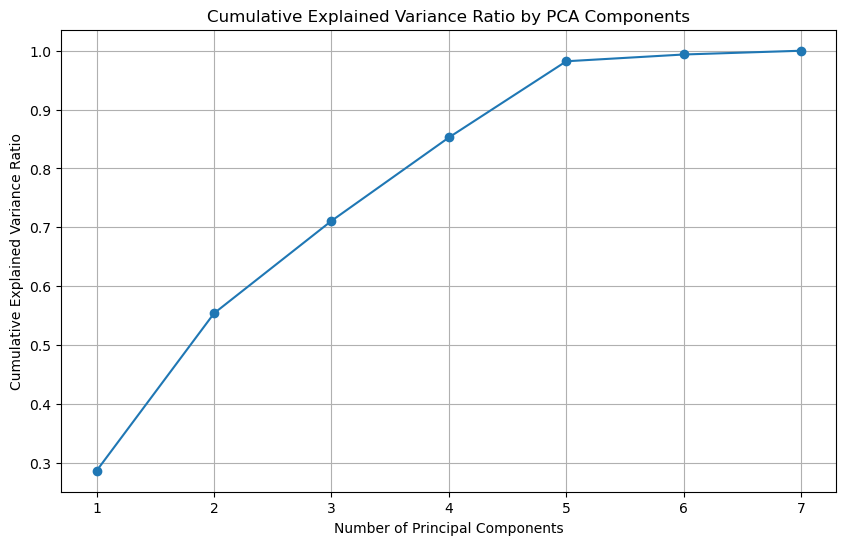

In [18]:
from sklearn.decomposition import PCA

numerical_features = ['longitude', 'latitude', 'housingMedianAge', 'medianIncome', 'meanRooms', 'meanBedrooms', 'meanOccupation']
X = data3[numerical_features]
y = data3['medianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA on the training set
pca = PCA(random_state=5508)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()

## (b)

In [19]:
# Determine the number of components to preserve at least 90% of the variance
n_components_90_variance = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(f"Number of principal components to preserve at least 90% variance: {n_components_90_variance}")

Number of principal components to preserve at least 90% variance: 5


## (c)

In [20]:
# Train a Linear Regression model using the selected number of principal components
pca_90 = PCA(n_components=n_components_90_variance, random_state=5508)
X_train_pca_90 = pca_90.fit_transform(X_train_scaled)
X_test_pca_90 = pca_90.transform(X_test_scaled)

lr_model_pca = LinearRegression()
lr_model_pca.fit(X_train_pca_90, y_train)

y_train_pred_pca = lr_model_pca.predict(X_train_pca_90)
y_test_pred_pca = lr_model_pca.predict(X_test_pca_90)
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_test_pred_pca))

print(f"RMSE on the training set with PCA: {rmse_train_pca}")
print(f"RMSE on the test set with PCA: {rmse_test_pca}")


RMSE on the training set with PCA: 0.8058705407640098
RMSE on the test set with PCA: 1.3394144069946137


## (d)

In [21]:
from sklearn.pipeline import Pipeline

# Set up the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=5508)),
    ('linear_regression', LinearRegression())
])


param_grid = {
    'pca__n_components': range(1, len(numerical_features) + 1)
}

grid_search_pca = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_pca.fit(X_train, y_train)

best_pca_model = grid_search_pca.best_estimator_
best_n_components = grid_search_pca.best_params_['pca__n_components']

y_train_pred_best_pca = best_pca_model.predict(X_train)
y_test_pred_best_pca = best_pca_model.predict(X_test)
rmse_train_best_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_best_pca))
rmse_test_best_pca = np.sqrt(mean_squared_error(y_test, y_test_pred_best_pca))

print(f"The optimal number of principal components according to Grid-Search: {best_n_components}")
print(f"RMSE on the training set with optimal PCA: {rmse_train_best_pca}")
print(f"RMSE on the test set with optimal PCA: {rmse_test_best_pca}")

The optimal number of principal components according to Grid-Search: 7
RMSE on the training set with optimal PCA: 0.7189383142730591
RMSE on the test set with optimal PCA: 1.1783865331169283


# D9

## (a)


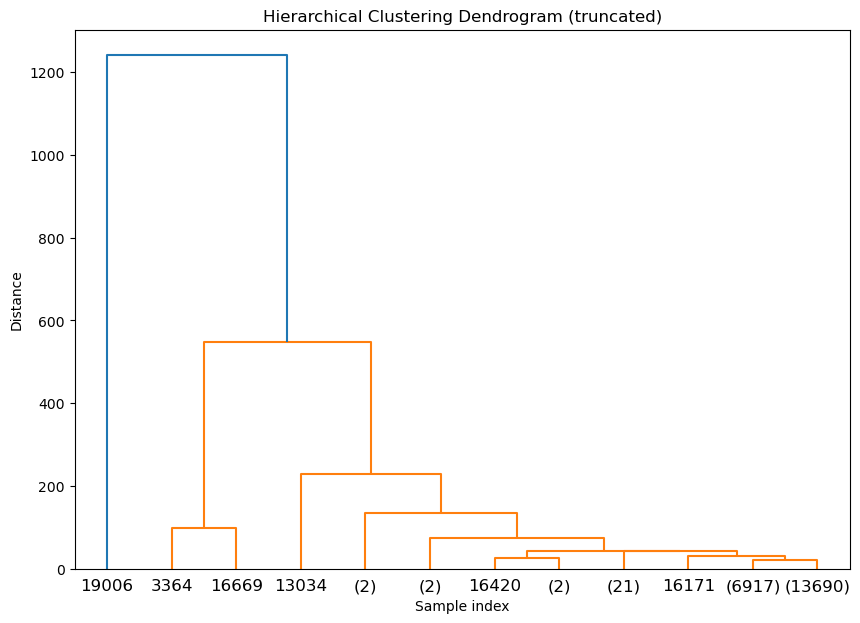

          longitude   latitude  housingMedianAge  medianIncome  meanRooms  \
Cluster                                                                     
1       -120.605000  37.865000         41.000000      4.890900   7.109890   
2       -119.569411  35.631367         28.636364      3.870154   5.428809   
3       -121.150000  38.690000         52.000000      6.135900   8.275862   
4       -121.980000  38.320000         45.000000     10.226400   3.166667   

         meanBedrooms  meanOccupation  
Cluster                                
1            1.225275      551.087912  
2            1.096655        2.946435  
3            1.517241      230.172414  
4            0.833333     1243.333333  
Cluster
2    20636
1        2
3        1
4        1
Name: count, dtype: int64


In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

numerical_features = ['longitude', 'latitude', 'housingMedianAge', 'medianIncome', 'meanRooms', 'meanBedrooms', 'meanOccupation']
X = data3[numerical_features]

# Perform hierarchical clustering with average linkage and Euclidean distance
Z = linkage(X, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form four clusters
clusters = fcluster(Z, t=4, criterion='maxclust')

# Add cluster labels to the data
data3['Cluster'] = clusters

# Calculate the mean of the variables for each cluster
cluster_means = data3.groupby('Cluster')[numerical_features].mean()
print(cluster_means)

# Summarize characteristics and size of each cluster
cluster_sizes = data3['Cluster'].value_counts()
print(cluster_sizes)

## (b)

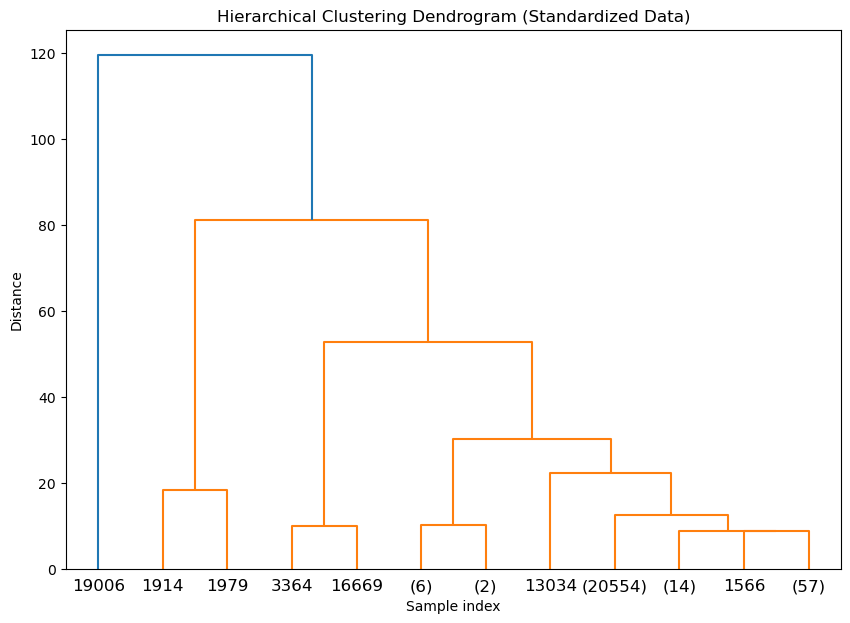

                0         1         2         3          4          5  \
Cluster                                                                 
1       -0.259695  1.509030  0.386207 -0.326708  53.268465  60.677100   
2       -0.516748  1.045525  0.982143  0.537026   0.679391   0.271365   
3        0.000134 -0.000309 -0.000196 -0.000183  -0.005184  -0.005880   
4       -1.203053  1.258550  1.299975  3.345515  -0.914402  -0.555691   

                  6  
Cluster              
1         -0.048818  
2         52.766023  
3         -0.010897  
4        119.419103  
3    20635
1        2
2        2
4        1
Name: count, dtype: int64


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering with average linkage and Euclidean distance on standardized data
Z_scaled = linkage(X_scaled, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_scaled, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram (Standardized Data)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form four clusters
clusters_scaled = fcluster(Z_scaled, t=4, criterion='maxclust')

# Add cluster labels to the standardized data
data3['Cluster_scaled'] = clusters_scaled

# Calculate the mean of the variables for each cluster
cluster_means_scaled = pd.DataFrame(X_scaled).assign(Cluster=clusters_scaled).groupby('Cluster').mean()
print(cluster_means_scaled)

# Summarize characteristics and size of each cluster
cluster_sizes_scaled = pd.Series(clusters_scaled).value_counts()
print(cluster_sizes_scaled)


## (c)

In [24]:
from sklearn.cluster import KMeans

# Perform k-means clustering with k=4 using initial centroids from hierarchical clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5508)
kmeans.fit(X_scaled)
kmeans_clusters = kmeans.labels_

# Add k-means cluster labels to the data
data3['KMeans_Cluster'] = kmeans_clusters

# Compare k-means clusters with hierarchical clusters
comparison = pd.crosstab(data3['Cluster_scaled'], data3['KMeans_Cluster'])
print(comparison)


KMeans_Cluster      0     1   2     3
Cluster_scaled                       
1                   0     0   2     0
2                   0     2   0     0
3               11733  3993  68  4841
4                   0     1   0     0


## (d)

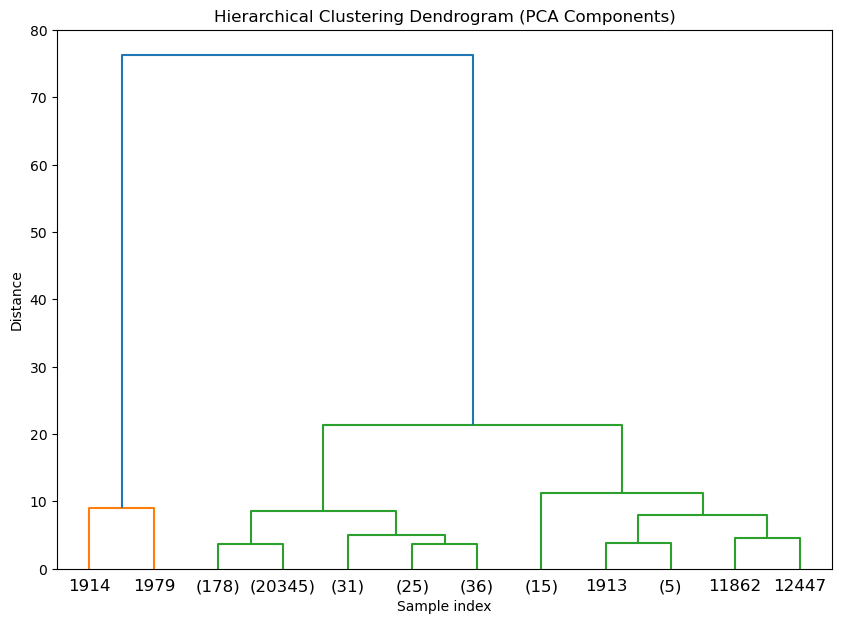

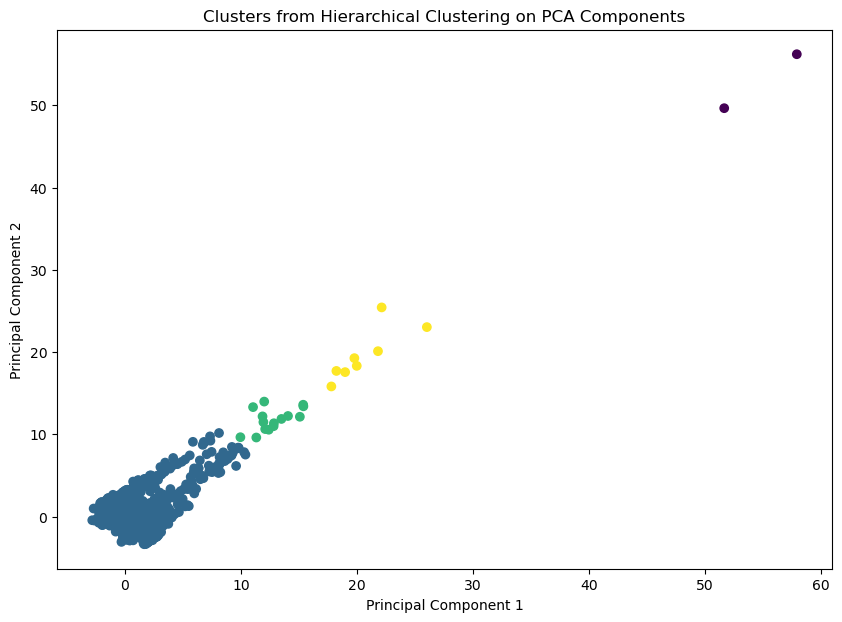

                 0          1
Cluster                      
1        54.809302  52.932335
2        -0.022605  -0.021351
3        12.774548  11.801539
4        20.594681  19.658176
2    20615
3       15
4        8
1        2
Name: count, dtype: int64


In [25]:
# Perform PCA on the standardized data
pca = PCA(n_components=2, random_state=5508)
X_pca = pca.fit_transform(X_scaled)

# Perform hierarchical clustering on the first two principal components
Z_pca = linkage(X_pca, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_pca, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram (PCA Components)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form four clusters
clusters_pca = fcluster(Z_pca, t=4, criterion='maxclust')

# Plot the first two principal components with cluster colors
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('Clusters from Hierarchical Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Add PCA cluster labels to the data
data3['PCA_Cluster'] = clusters_pca

# Summarize characteristics and size of each cluster
cluster_means_pca = pd.DataFrame(X_pca).assign(Cluster=clusters_pca).groupby('Cluster').mean()
print(cluster_means_pca)
cluster_sizes_pca = pd.Series(clusters_pca).value_counts()
print(cluster_sizes_pca)


## (e)

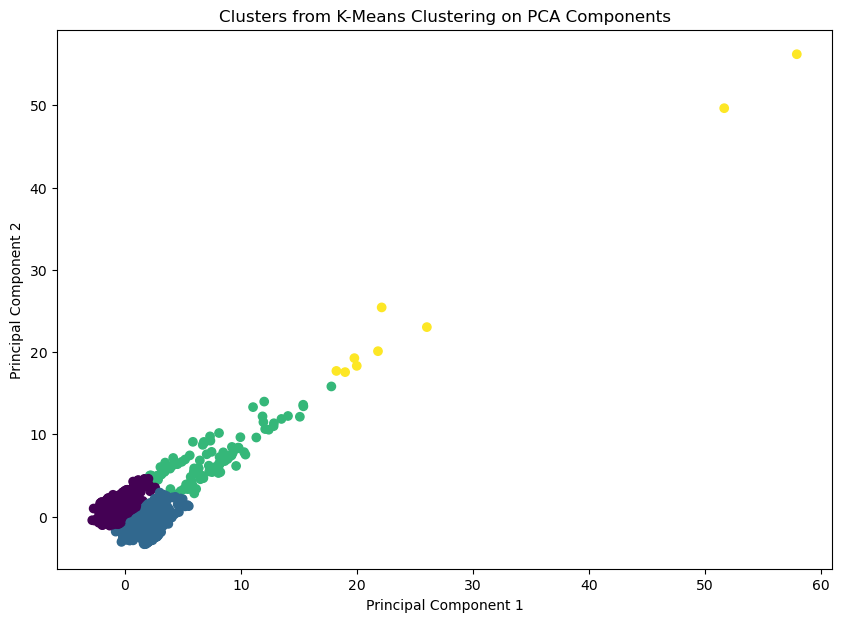

KMeans_PCA_Cluster      0     1   2  3
PCA_Cluster                           
1                       0     0   0  2
2                   11939  8583  93  0
3                       0     0  15  0
4                       0     0   1  7


In [26]:
# Perform k-means clustering on the first two principal components
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=5508)
kmeans_pca.fit(X_pca)
kmeans_pca_clusters = kmeans_pca.labels_

# Plot the first two principal components with k-means cluster colors
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_clusters, cmap='viridis')
plt.title('Clusters from K-Means Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Add k-means PCA cluster labels to the data
data3['KMeans_PCA_Cluster'] = kmeans_pca_clusters

# Compare k-means PCA clusters with hierarchical PCA clusters
comparison_pca = pd.crosstab(data3['PCA_Cluster'], data3['KMeans_PCA_Cluster'])
print(comparison_pca)


# D10

## (a)

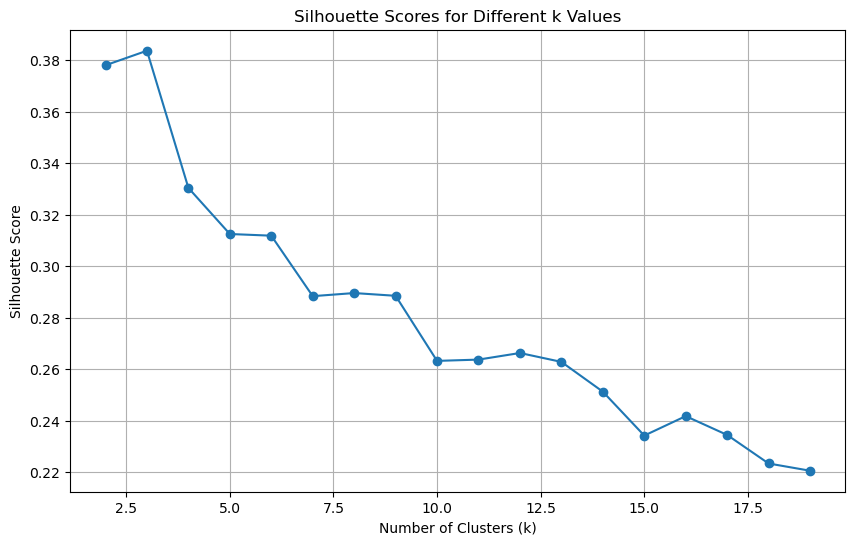

The optimal value of k according to silhouette score: 3


In [27]:
from sklearn.metrics import silhouette_score

numerical_features = ['longitude', 'latitude', 'housingMedianAge', 'medianIncome', 'meanRooms', 'meanBedrooms', 'meanOccupation']
X = data3[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute silhouette scores for different k values
silhouette_scores = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5508)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.grid(True)
plt.show()

# Optimal k value according to silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal value of k according to silhouette score: {optimal_k}")


## (b)

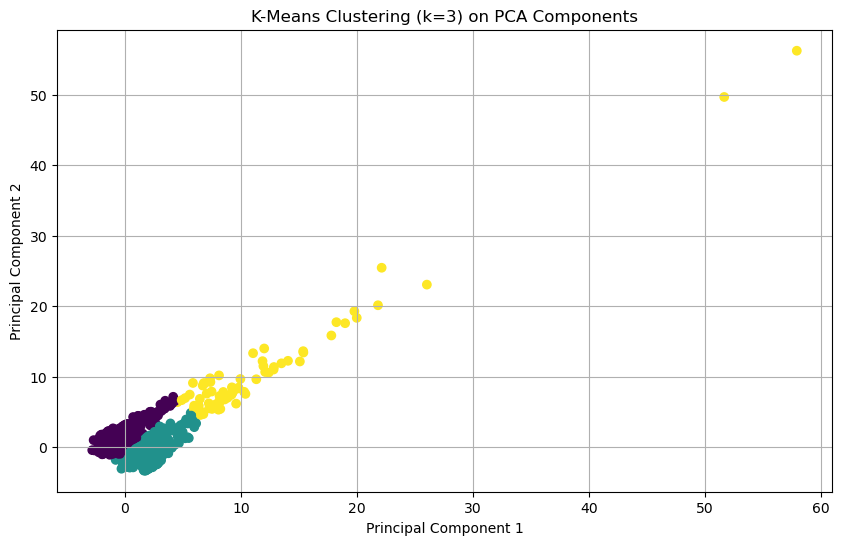

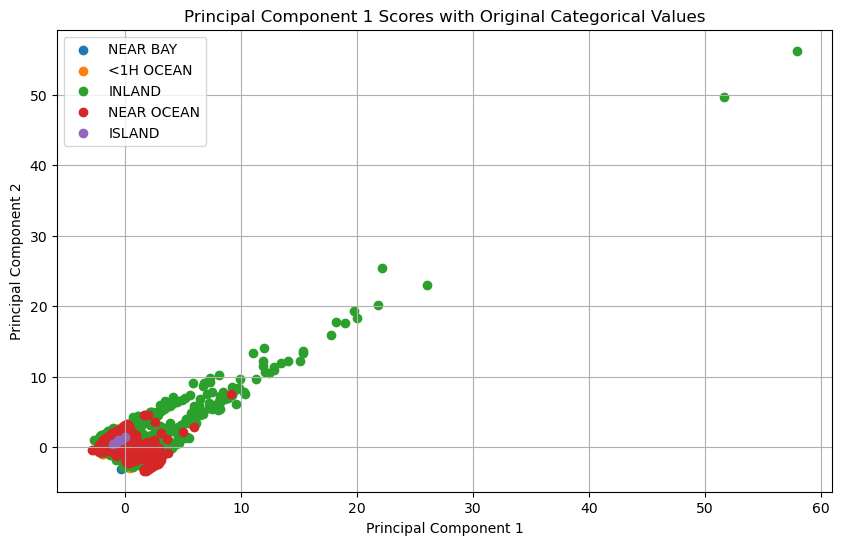

In [28]:
# Perform PCA on the standardized data
pca = PCA(n_components=2, random_state=5508)
X_pca = pca.fit_transform(X_scaled)

# Perform k-means clustering with the optimal k value
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=5508)
kmeans_optimal.fit(X_scaled)
labels_optimal = kmeans_optimal.labels_

# Plot the k groups on the first two principal component scores
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimal, cmap='viridis')
plt.title(f'K-Means Clustering (k={optimal_k}) on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Plot the first principal component scores with the original categorical values
categorical_values = housing_df['oceanProximity']  # Use the original categorical column from housing_df
unique_categories = categorical_values.unique()
category_colors = {category: color for category, color in zip(unique_categories, plt.cm.tab10.colors)}

plt.figure(figsize=(10, 6))
for category, color in category_colors.items():
    mask = categorical_values == category
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[color], label=category)
plt.title('Principal Component 1 Scores with Original Categorical Values')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
